In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch

# Preprocessing

In [2]:
# Loads the data
array_path = "data/x_test_array.npz"
trajectories = np.load(array_path)["x_train_array"][:10000, ].reshape(-1, 100)

# Standardizes the data
scaler = StandardScaler()
trajectories = scaler.fit_transform(trajectories)
trajectories = torch.tensor(trajectories, dtype=torch.float32)

# PPCA

**This section is not used since the PPCA algorithm we implemented diverges on the taxi dataset, whatever we do. We tried implementing variants of it (in the ppca.py file) but never managed to get good results with it.
We thus simply use standard pca to reduce the data dimensionality**

In [3]:
# from ppca import PPCA_with_ARD_model, PPCA_ARD_True
# from advi import ADVI

# N, D, ppca_K = 320, 100, 11

# ppca = PPCA_with_ARD_model(D, ppca_K)
# advi = ADVI(ppca, num_samples = 5, batch_size=320, lr=0.0001, mode='meanfield', num_epochs=200)

# advi.fit(trajectories,method="Adam", plotting=True, use_grad_clip=False)

Fitting...:   0%|          | 0/200 [00:00<?, ?it/s]

Ws tensor([[-0.1813,  2.5329, -0.1459,  ...,  0.5389,  1.0802,  0.9791],
        [-0.2106,  3.5573,  0.0807,  ..., -2.8159, -3.1814,  0.4885],
        [ 0.1763, -1.7378,  0.1451,  ...,  7.0385, -0.6236, -1.5243],
        ...,
        [ 0.0471,  0.2288, -0.1506,  ..., -0.0243, -1.3715,  0.9309],
        [-0.1067, -0.0121,  0.2898,  ..., -5.9620,  3.9999,  1.0519],
        [-0.0394,  0.8403, -0.0180,  ..., -0.1125, -1.9492, -0.9971]],
       grad_fn=<MulBackward0>) tensor([[-0.1813, -0.2106,  0.1763,  ...,  0.0471, -0.1067, -0.0394],
        [ 2.5329,  3.5573, -1.7378,  ...,  0.2288, -0.0121,  0.8403],
        [-0.1459,  0.0807,  0.1451,  ..., -0.1506,  0.2898, -0.0180],
        ...,
        [ 0.5389, -2.8159,  7.0385,  ..., -0.0243, -5.9620, -0.1125],
        [ 1.0802, -3.1814, -0.6236,  ..., -1.3715,  3.9999, -1.9492],
        [ 0.9791,  0.4885, -1.5243,  ...,  0.9309,  1.0519, -0.9971]],
       grad_fn=<TBackward0>)
sig tensor([ 2.3833,  0.6275,  0.2046,  0.8968,  2.7780,  1.7624,  4.

Exception: Error in the distribution

# PCA

In [3]:
from sklearn.decomposition import PCA

ppca_K = 11
pca = PCA(n_components=ppca_K)

trajectories = trajectories.numpy()
pca_traj = pca.fit_transform(trajectories)
pca_traj.shape

(10000, 11)

# GMM

Do not execute this cell, it takes quite some time to run

Fitting...: 100%|██████████| 50/50 [25:37<00:00, 30.74s/it] 


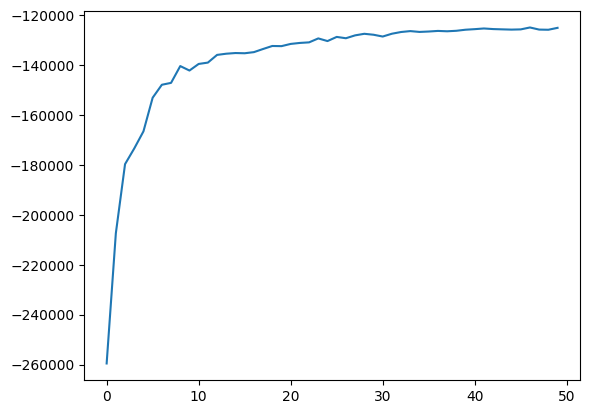

In [4]:
from advi import ADVI
from gmm import GMM

n_clusters = 10
pca_D = 11

gmm = GMM(pca_D, n_clusters, alpha_0=1000)
advi = ADVI(gmm, num_samples = 1, batch_size=1000, lr=0.1, mode='meanfield', num_epochs=50)

advi.fit(torch.tensor(pca_traj, dtype=torch.float32),method="Adam", plotting=True, use_grad_clip=False)

In [8]:
params = advi.model_params.vparams.detach().numpy()

p = params[0, :n_clusters]
mu = params[0, n_clusters:n_clusters+n_clusters*pca_D].reshape(n_clusters, pca_D)
sigma = params[0, n_clusters+n_clusters*pca_D:].reshape(n_clusters, pca_D)

print(p.shape, mu.shape, sigma.shape) #sanity check

(10,) (10, 11) (10, 11)


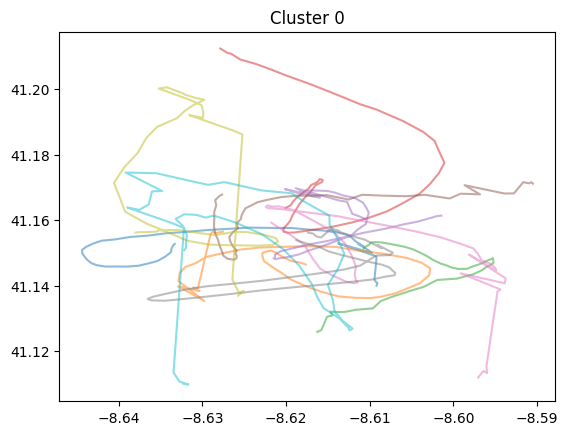

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


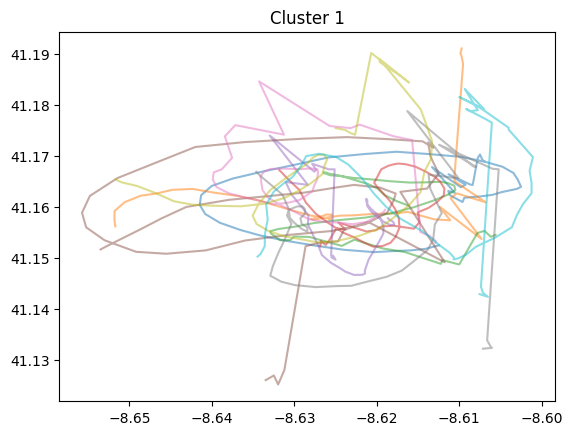

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


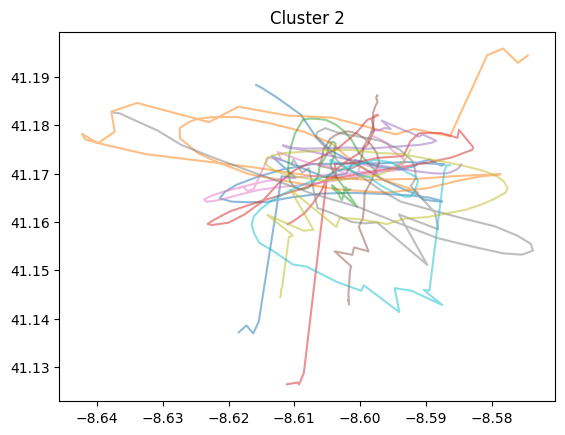

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


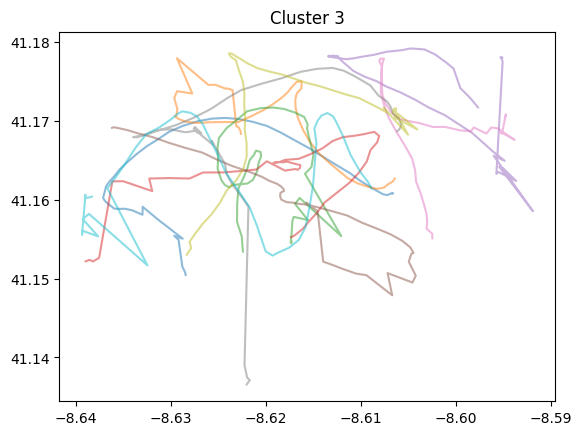

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


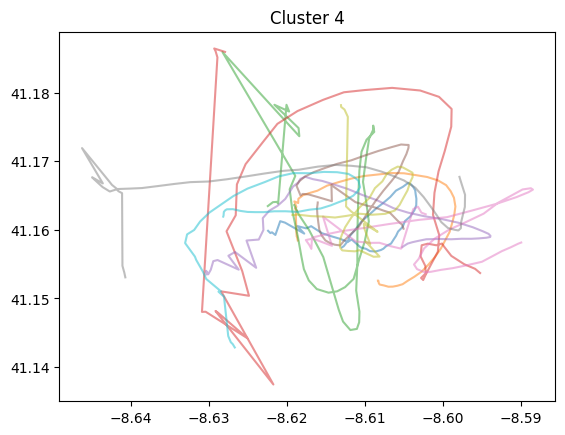

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


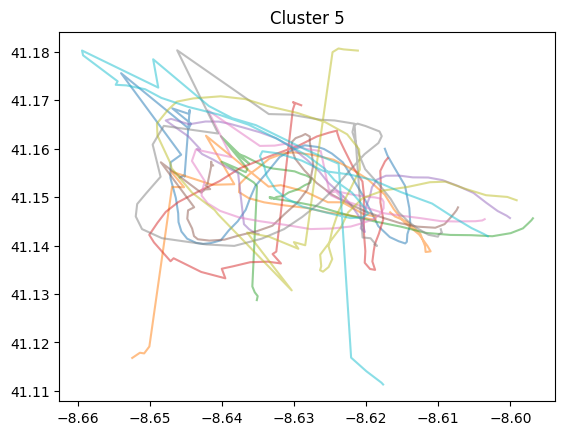

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


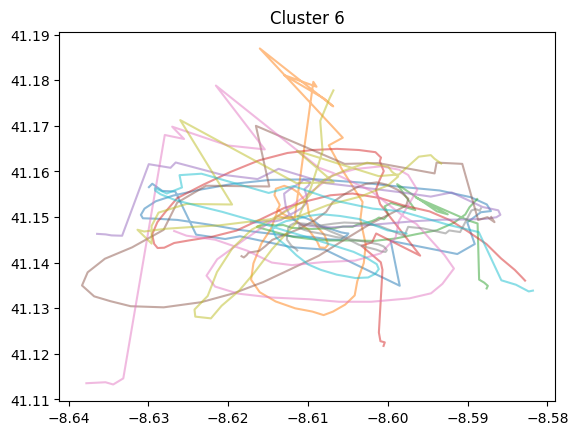

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


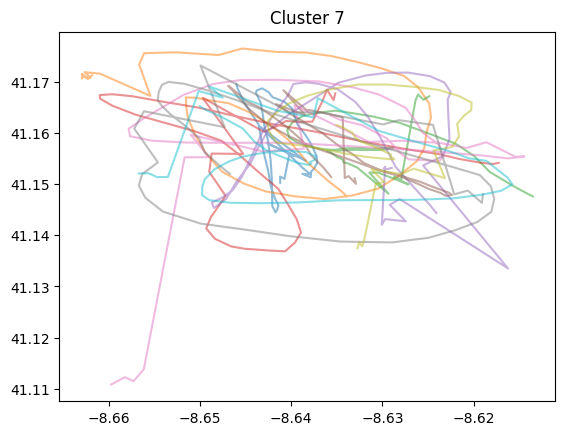

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


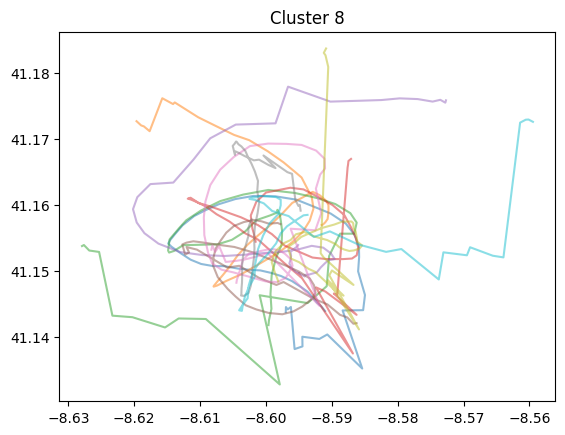

C:\Users\quent\AppData\Local\Temp\ipykernel_44020\3117232183.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, np.diag(std), 10)


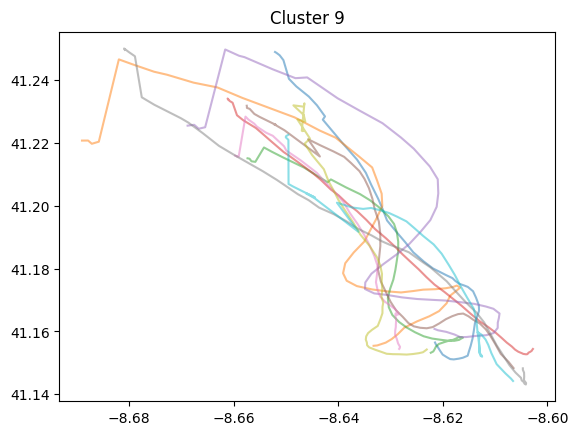

In [10]:
for idx_cluster in range(n_clusters):
    # samples 10 trajectories from the cluster
    mean = mu[idx_cluster]
    std = sigma[idx_cluster]

    samples = np.random.multivariate_normal(mean, np.diag(std), 10)
    samples = pca.inverse_transform(samples)
    samples = scaler.inverse_transform(samples)
    samples = samples.reshape(-1, 50, 2)
    plt.figure()
    for traj in samples:
        plt.plot(traj[:, 0], traj[:, 1], alpha=0.5)
    plt.title(f"Cluster {idx_cluster}")
    plt.show()